In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import json

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, hamming_loss, roc_auc_score, precision_recall_fscore_support, auc, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

import pydot
from tensorflow.keras.utils import model_to_dot
from tabulate import tabulate

To begin, we will load the stored models (the last three of them). Loading X_test and y_test is the next step before prediction.

In [ ]:
model_1 = tf.keras.models.load_model('../models/model_densenet_3.h5')
model_2 = tf.keras.models.load_model('../models/model_densenet_4.h5')
model_3 = tf.keras.models.load_model('../models/model_densenet_5.h5')

In [ ]:
data = pd.read_csv('../data/all_data.csv')

In [ ]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
X_test = np.load('../data/X_test.npy')
y_test = np.load('../data/y_test.npy')

In [ ]:
y_predicted_prob_1 = model_1.predict(X_test)
y_predicted_prob_2 = model_2.predict(X_test)
y_predicted_prob_3 = model_3.predict(X_test)

80/80 [==============================] - 63s 751ms/step


We want to obtain a vector in which the probabilities are replaced by 1 or 0. As threshold value 0.35 is used.

In [ ]:
y_predicted_tmp_1 = [[1 if element >= 0.35 else 0 for element in row] for row in y_predicted_prob_1]
y_predicted_tmp_2 = [[1 if element >= 0.35 else 0 for element in row] for row in y_predicted_prob_2]
y_predicted_tmp_3 = [[1 if element >= 0.35 else 0 for element in row] for row in y_predicted_prob_3]

In [ ]:
y_predicted_1 = np.array(y_predicted_tmp_1)
y_predicted_2 = np.array(y_predicted_tmp_2)
y_predicted_3 = np.array(y_predicted_tmp_3)

In [ ]:
genres = data.columns[5:]
genres

Index(['Romance', 'Sci-Fi', 'Comedy', 'Horror', 'Thriller', 'Drama', 'Action'], dtype='object')

The first metric we will use is the *F1 score*. Before that, we want to print the classification report. The *precision_recall_fscore_support* function is used to create a vector containing the *F1 score* value for each label.

In [ ]:
report = classification_report(y_test, y_predicted_1, target_names = genres)
print(report)

              precision    recall  f1-score   support

     Romance       0.35      0.46      0.40       552
      Sci-Fi       0.13      0.01      0.02       220
      Comedy       0.65      0.71      0.68       999
      Horror       0.34      0.75      0.47       428
    Thriller       0.29      0.72      0.42       430
       Drama       0.67      0.75      0.71      1472
      Action       0.30      0.02      0.04       258

   micro avg       0.49      0.62      0.55      4359
   macro avg       0.39      0.49      0.39      4359
weighted avg       0.51      0.62      0.53      4359
 samples avg       0.52      0.65      0.54      4359



In [ ]:
precision_1, recall_1, f1_1, support_1 = precision_recall_fscore_support(y_test, y_predicted_1)

In [ ]:
print(classification_report(y_test, y_predicted_2, target_names = genres))

              precision    recall  f1-score   support

     Romance       0.31      0.43      0.36       552
      Sci-Fi       0.20      0.01      0.03       220
      Comedy       0.49      0.90      0.63       999
      Horror       0.38      0.55      0.45       428
    Thriller       0.32      0.47      0.38       430
       Drama       0.58      1.00      0.73      1472
      Action       0.40      0.02      0.04       258

   micro avg       0.48      0.70      0.57      4359
   macro avg       0.38      0.48      0.38      4359
weighted avg       0.45      0.70      0.52      4359
 samples avg       0.50      0.75      0.57      4359



In [ ]:
precision_2, recall_2, f1_2, support_2 = precision_recall_fscore_support(y_test, y_predicted_2)

In [ ]:
print(classification_report(y_test, y_predicted_3, target_names = genres))

              precision    recall  f1-score   support

     Romance       0.41      0.14      0.21       552
      Sci-Fi       0.00      0.00      0.00       220
      Comedy       0.50      0.89      0.64       999
      Horror       0.59      0.10      0.16       428
    Thriller       0.00      0.00      0.00       430
       Drama       0.58      1.00      0.73      1472
      Action       0.00      0.00      0.00       258

   micro avg       0.54      0.57      0.55      4359
   macro avg       0.30      0.30      0.25      4359
weighted avg       0.42      0.57      0.44      4359
 samples avg       0.55      0.63      0.55      4359



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
precision_3, recall_3, f1_3, support_3 = precision_recall_fscore_support(y_test, y_predicted_3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
list_of_genres = genres.to_list()
list_of_genres

['Romance', 'Sci-Fi', 'Comedy', 'Horror', 'Thriller', 'Drama', 'Action']

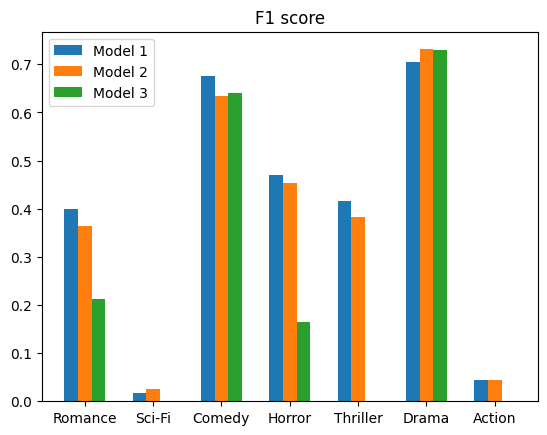

In [ ]:
x = np.arange(len(list_of_genres))

bar_width = 0.2

plt.bar(x - bar_width, f1_1, bar_width, label = 'Model 1')
plt.bar(x, f1_2, bar_width, label = 'Model 2')
plt.bar(x + bar_width, f1_3, bar_width, label = 'Model 3')

plt.xticks(x, list_of_genres)
plt.title("F1 score")
plt.legend()
plt.show()

From the previous bar, it is clear that the first model is perhaps the best. We reject the third model because we see that it does not predict some genres at all (Sci-Fi, Action). The first and second models are quite similar, but it looks like the first model has a better F1 overall. We can also see that our models are not so good at predicting genres with a small number of elements.

The following function calculates the average of a metric array for each model and displays the results in a table.

In [ ]:
def generate_table_for_metrics(genres, metrics_1, metrics_2, metrics_3, metrics_name):
  data = [[genres[i],
           round(metrics_1[i], 2),
           round(metrics_2[i], 2),
           round(metrics_3[i], 2)] for i in np.arange(len(genres))]

  data.append(["", '', '', ''])
  data.append(["AVERAGE",
              round(sum([row[1] for row in data[:-1]])/(len([row[1] for row in data]) - 1.0), 2),
              round(sum([row[2] for row in data[:-1]])/(len([row[2] for row in data]) - 1.0), 2),
              round(sum([row[3] for row in data[:-1]])/(len([row[3] for row in data]) - 1.0), 2)])

  headers = ["", "MODEL 1", "MODEL 2", "MODEL 3"]

  title = metrics_name + " SCORE"
  title_length = len(title)
  title_centered = title.center(len(headers) * 12)

  table = tabulate(data, headers,  tablefmt = "heavy_outline", stralign = "center", numalign = "center")

  table_with_title = title_centered + '\n' + table

  print(table_with_title)

We will show the average of F1 scores for each genre in a table.

In [ ]:
generate_table_for_metrics(genres, f1_1, f1_2, f1_3, "F1")

                    F1 SCORE                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃          ┃  MODEL 1  ┃  MODEL 2  ┃  MODEL 3  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Romance  ┃    0.4    ┃   0.36    ┃   0.21    ┃
┃  Sci-Fi  ┃   0.02    ┃   0.03    ┃    0.0    ┃
┃  Comedy  ┃   0.68    ┃   0.63    ┃   0.64    ┃
┃  Horror  ┃   0.47    ┃   0.45    ┃   0.16    ┃
┃ Thriller ┃   0.42    ┃   0.38    ┃    0.0    ┃
┃  Drama   ┃   0.71    ┃   0.73    ┃   0.73    ┃
┃  Action  ┃   0.04    ┃   0.04    ┃    0.0    ┃
┃          ┃           ┃           ┃           ┃
┃ AVERAGE  ┃   0.39    ┃   0.37    ┃   0.25    ┃
┗━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┛


Based on the previous table and the average, it is obvious that the first model has the best overall F1 score.

The following function plots the ROC curve for each genre of a given model. It then compares the models and their ROC curves, as well as the AUC average, which will be displayed in a table.

In [ ]:
def plot_roc_curve(y_test, y_predicted, model_index, genres):
  n = len(genres)
  roc_auc_scores = []

  for i in range(n):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_predicted[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    plt.plot(fpr, tpr, label = f'{genres[i]} (AUC = {roc_auc:.2f})')

  plt.plot([0, 1], [0, 1], 'k--', label = 'Random Classifier')

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title(f'ROC Curve - Model {model_index}')
  plt.legend(loc = 'lower right')

  return roc_auc_scores

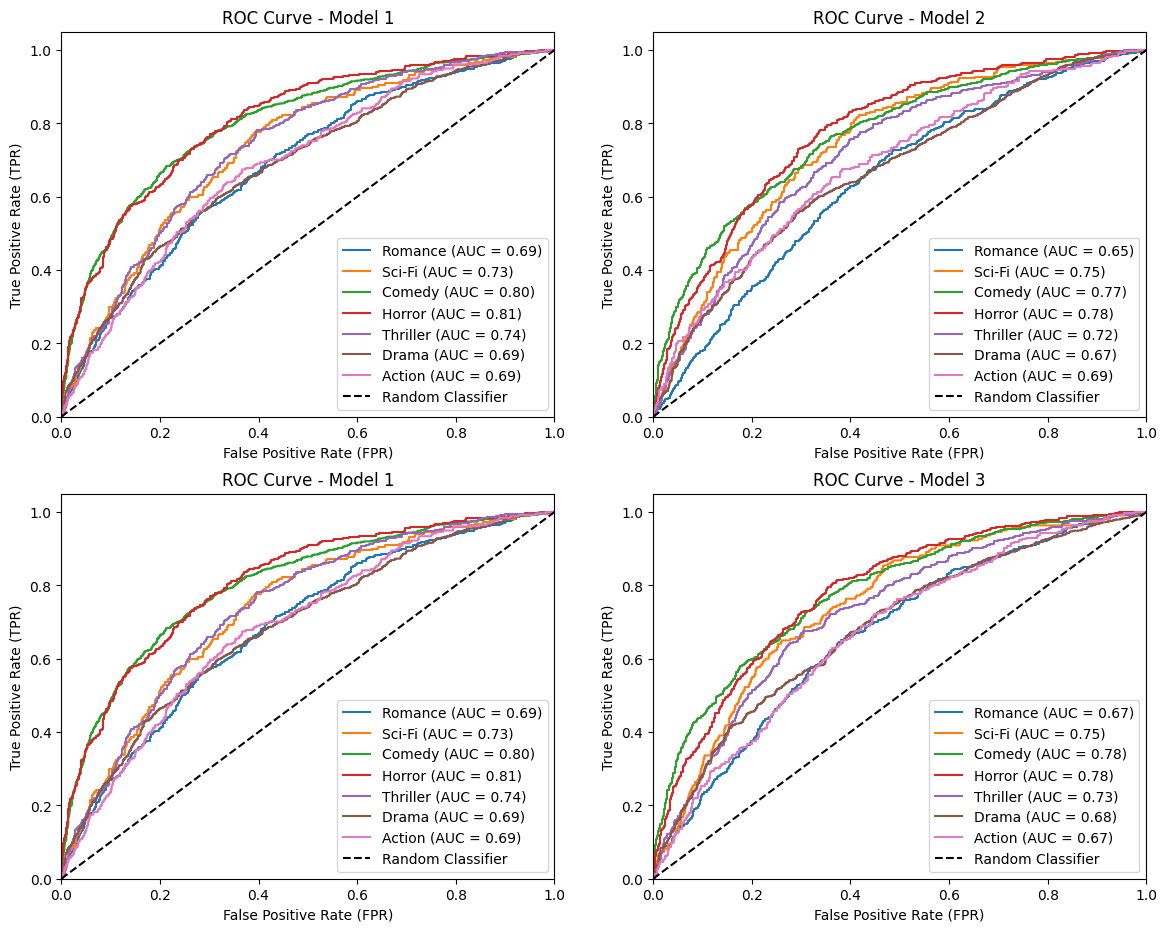

In [ ]:
plt.figure(figsize = (14, 11))

plt.subplot(2, 2, 1)
auc_1 = plot_roc_curve(y_test, y_predicted_prob_1, 1, genres)

plt.subplot(2, 2, 2)
auc_2 = plot_roc_curve(y_test, y_predicted_prob_2, 2, genres)

plt.subplot(2, 2, 3)
plot_roc_curve(y_test, y_predicted_prob_1, 1, genres)

plt.subplot(2, 2, 4)
auc_3 = plot_roc_curve(y_test, y_predicted_prob_3, 3, genres)

plt.show()

In the previous graphic, we compared the *ROC curves* for each genre of the first model with the second and the first model with the third. Obviously, the *ROC curves* of the first model are more convex than the other two, which indicates that the first model has the best predictions. We can make the same conclusion when we consider the AUC score for each genre.

In [ ]:
generate_table_for_metrics(genres, auc_1, auc_2, auc_3, "AUC")

                   AUC SCORE                    
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃          ┃  MODEL 1  ┃  MODEL 2  ┃  MODEL 3  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Romance  ┃   0.69    ┃   0.65    ┃   0.67    ┃
┃  Sci-Fi  ┃   0.73    ┃   0.75    ┃   0.75    ┃
┃  Comedy  ┃    0.8    ┃   0.77    ┃   0.78    ┃
┃  Horror  ┃   0.81    ┃   0.78    ┃   0.78    ┃
┃ Thriller ┃   0.74    ┃   0.72    ┃   0.73    ┃
┃  Drama   ┃   0.69    ┃   0.67    ┃   0.68    ┃
┃  Action  ┃   0.69    ┃   0.69    ┃   0.67    ┃
┃          ┃           ┃           ┃           ┃
┃ AVERAGE  ┃   0.74    ┃   0.72    ┃   0.72    ┃
┗━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┛


The third metric we will use is the *Brier score*. The *Brier score* is used to calculate the mean squared error between the predicted probabilities and the observed values (actual values). The value of the Brier score is always between 0.0 and 1.0, where a model with perfect skill has a score of 0.0 and the worst model has a score of 1.0.

In [ ]:
brier_score_1 = np.mean((y_test - y_predicted_prob_1) ** 2, axis = 0)
brier_score_1

array([0.15872177, 0.08177307, 0.17412999, 0.13443188, 0.14144333,
       0.23376253, 0.0930813 ])

In [ ]:
brier_score_2 = np.mean((y_test - y_predicted_prob_2) ** 2, axis = 0)
brier_score_2

array([0.16898679, 0.07804518, 0.20168303, 0.12384856, 0.13583993,
       0.23094996, 0.09273722])

In [ ]:
brier_score_3 = np.mean((y_test - y_predicted_prob_3) ** 2, axis = 0)
brier_score_3

array([0.16251399, 0.0743508 , 0.1975476 , 0.12126448, 0.12926547,
       0.22609681, 0.08793067])

In [ ]:
generate_table_for_metrics(genres, brier_score_1, brier_score_2, brier_score_3, "BRIER")

                  BRIER SCORE                   
┏━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃          ┃  MODEL 1  ┃  MODEL 2  ┃  MODEL 3  ┃
┣━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━┫
┃ Romance  ┃   0.16    ┃   0.17    ┃   0.16    ┃
┃  Sci-Fi  ┃   0.08    ┃   0.08    ┃   0.07    ┃
┃  Comedy  ┃   0.17    ┃    0.2    ┃    0.2    ┃
┃  Horror  ┃   0.13    ┃   0.12    ┃   0.12    ┃
┃ Thriller ┃   0.14    ┃   0.14    ┃   0.13    ┃
┃  Drama   ┃   0.23    ┃   0.23    ┃   0.23    ┃
┃  Action  ┃   0.09    ┃   0.09    ┃   0.09    ┃
┃          ┃           ┃           ┃           ┃
┃ AVERAGE  ┃   0.14    ┃   0.15    ┃   0.14    ┃
┗━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━┛


From the above table, we can see that the first and third models have the lowest values of *Brier score*. Since we have rejected the third model at the very beginning, we choose Model 1 as the **best**.

At the very end, we will select a random movie ID and display the predictions of each model. We will select 3 genres whose probabilities are highest in the prediction.

In [ ]:
def get_genre(movie_id, data):
  row = data.loc[data['movieID'] == movie_id*1.0]

  result = [g for g in genres if row[g].any() == 1]

  return result

In [ ]:
def get_predicted_genre(movie_id, model, data):
    img_path = '../data/images/im' + str(int(movie_id)) + '.jpg'
    img = image.load_img(img_path, target_size = (80, 80, 3))
    img = image.img_to_array(img)
    img = img/255.0

    prob = model.predict(img.reshape(1, 80, 80, 3))

    true_genres = get_genre(movie_id, data)
    length = len(true_genres)
    predicted_genres = np.argsort(prob[0])[-1 : -4  : -1]

    print('True genres: ')
    for i in np.arange(length):
      print(f'\t{true_genres[i]}')

    print('Predicted genres: ')
    for i in np.arange(3):
      genre_index = predicted_genres[i]
      print(f'\t{genres[genre_index]} {prob[0][genre_index]*100 : .2f}%')

In [ ]:
def show_image(movie_id):
    img_path = '../data/images/im' + str(int(movie_id)) + '.jpg'
    img = image.load_img(img_path, target_size = (80, 80, 3))
    img = image.img_to_array(img)
    img = img/255.0

    img_title = data.loc[data.movieID == movie_id]['title'].values[0]
    plt.title(img_title)
    plt.imshow(img)

In [ ]:
def get_random_id(data):
  random_index = random.randint(0, len(data) - 1)

  random_movie_id = data.loc[random_index, 'movieID']

  return random_movie_id

                   MODEL 1

1/1 [==============================] - 0s 59ms/step
True genres: 
	Horror
	Thriller
	Drama
Predicted genres: 
	Thriller  55.84%
	Horror  55.64%
	Drama  31.72%

                    MODEL 2

1/1 [==============================] - 0s 60ms/step
True genres: 
	Horror
	Thriller
	Drama
Predicted genres: 
	Drama  68.86%
	Comedy  39.39%
	Romance  30.15%

                    MODEL 3

1/1 [==============================] - 0s 60ms/step
True genres: 
	Horror
	Thriller
	Drama
Predicted genres: 
	Drama  70.79%
	Comedy  38.16%
	Romance  31.59%



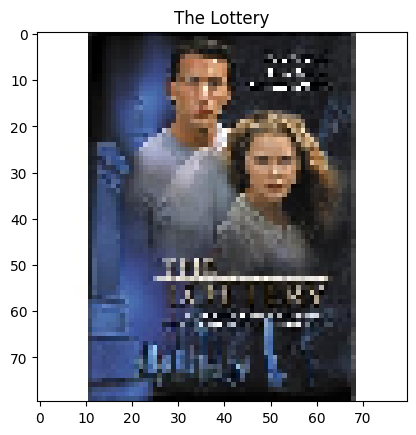

In [ ]:
movie_id = get_random_id(data)

print('                   \033[1mMODEL 1\033[0m')
print()
get_predicted_genre(movie_id, model_1, data)
print('===================================================')
print()

print('                    \033[1mMODEL 2\033[0m')
print()
get_predicted_genre(movie_id, model_2, data)
print('===================================================')
print()

print('                    \033[1mMODEL 3\033[0m')
print()
get_predicted_genre(movie_id, model_3, data)
print('===================================================')
print()

show_image(movie_id)